In [2]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import xarray as xr

In [3]:
ndvi_ds = Dataset('../data/SatImage/AVHRR-Land_v005_AVH13C1_NOAA-19_20160101_c20170620111714.nc')

In [4]:
print (ndvi_ds.variables.keys())

odict_keys(['latitude', 'longitude', 'time', 'crs', 'lat_bnds', 'lon_bnds', 'NDVI', 'TIMEOFDAY', 'QA'])


In [5]:
lat = ndvi_ds.variables['latitude']
lon = ndvi_ds.variables['longitude']
times = ndvi_ds.variables['time']
crs = ndvi_ds.variables['crs']
lat_bnds = ndvi_ds.variables['lat_bnds']
lon_bnds = ndvi_ds.variables['lon_bnds']
ndvi = ndvi_ds.variables['NDVI']
tod = ndvi_ds.variables['TIMEOFDAY']
qa = ndvi_ds.variables['QA']


In [8]:
# dl from https://www.ncdc.noaa.gov/cdr/terrestrial/normalized-difference-vegetation-index
# https://www.ncei.noaa.gov/data/avhrr-land-normalized-difference-vegetation-index/access/2016/
ndvi_ds = xr.open_dataset('../data/SatImage/AVHRR-Land_v005_AVH13C1_NOAA-19_20160101_c20170620111714.nc',decode_times=False)
ndvi_df = ndvi_ds.to_dataframe()

In [9]:
ndvi_df.head()

crs   lat_bnds    lon_bnds  NDVI  \
latitude  longitude   ncrs nv time                                          
89.974998 -179.975006 0    0  12783.0 -32767  90.000000 -180.000000   NaN   
                           1  12783.0 -32767  89.949997 -179.950012   NaN   
          -179.925003 0    0  12783.0 -32767  90.000000 -179.949997   NaN   
                           1  12783.0 -32767  89.949997 -179.900009   NaN   
          -179.875000 0    0  12783.0 -32767  90.000000 -179.899994   NaN   

                                       TIMEOFDAY    QA  
latitude  longitude   ncrs nv time                      
89.974998 -179.975006 0    0  12783.0        NaN  8000  
                           1  12783.0        NaN  8000  
          -179.925003 0    0  12783.0        NaN  8000  
                           1  12783.0        NaN  8000  
          -179.875000 0    0  12783.0        NaN  8000

In [11]:
for col in ndvi_df.columns: 
    print(col) 

crs
lat_bnds
lon_bnds
NDVI
TIMEOFDAY
QA


In [47]:
veg = Dataset('../data/gimms3g_ndvi_1982-2012.nc4')
print (veg.variables.keys())

lon = veg.variables['lon']
lat = veg.variables['lat']
time = veg.variables['time']
time_bnds = veg.variables['time_bnds']
ndvi = veg.variables['NDVI']

for v in veg.dimensions.items():
    print (v)

odict_keys(['time_bnds', 'time', 'NDVI', 'lat', 'lon'])
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 31
)
('nv', <class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 2
)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 840
)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 4320
)


In [11]:
ds = xr.open_dataset('../data/gimms3g_ndvi_1982-2012.nc4',decode_times=False)
df = ds.to_dataframe()

In [13]:
df.head(50)

time_bnds  NDVI
lat       lon         nv time                  
20.041667 -179.958333 0  6.5          5.0   NaN
                         18.5        17.0   NaN
                         30.5        29.0   NaN
                         42.5        41.0   NaN
                         54.5        53.0   NaN
                         66.5        65.0   NaN
                         78.5        77.0   NaN
                         90.5        89.0   NaN
                         102.5      101.0   NaN
                         114.5      113.0   NaN
                         126.5      125.0   NaN
                         138.5      137.0   NaN
                         150.5      149.0   NaN
                         162.5      161.0   NaN
                         174.5      173.0   NaN
                         186.5      185.0   NaN
                         198.5      197.0   NaN
                         210.5      209.0   NaN
                         222.5      221.0   NaN
                         234.5      233.0   NaN
                         246.5      245.0   NaN
                         258.5      257.0   NaN
                         270.5      269.0   NaN
                         282.5      281.0   NaN
                         294.5      293.0   NaN
                         306.5      305.0   NaN
                         318.5      317.0   NaN
                         330.5      329.0   NaN
                         342.5      341.0   NaN
                         354.5      353.0   NaN
                         366.5      365.0   NaN
                      1  6.5          8.0   NaN
                         18.5        20.0   NaN
                         30.5        32.0   NaN
                         42.5        44.0   NaN
                         54.5        56.0   NaN
                         66.5        68.0   NaN
                         78.5        80.0   NaN
                         90.5        92.0   NaN
                         102.5      104.0   NaN
                         114.5      116.0   NaN
                         126.5      128.0   NaN
                         138.5      140.0   NaN
                         150.5      152.0   NaN
                         162.5      164.0   NaN
                         174.5      176.0   NaN
                         186.5      188.0   NaN
                         198.5      200.0   NaN
                         210.5      212.0   NaN
                         222.5      224.0   NaN

In [40]:
df.columns = [' '.join(col).strip() for col in df.columns.values]
print(df)

                                t i m e _ b n d s  N D V I
lat       lon         nv time                             
20.041667 -179.958333 0  6.5                  5.0      NaN
                         18.5                17.0      NaN
                         30.5                29.0      NaN
                         42.5                41.0      NaN
                         54.5                53.0      NaN
...                                           ...      ...
89.958333  179.958333 1  318.5              320.0      NaN
                         330.5              332.0      NaN
                         342.5              344.0      NaN
                         354.5              356.0      NaN
                         366.5              368.0      NaN

[224985600 rows x 2 columns]


In [48]:
df.unstack(level=0)

t i m e _ b n d s                                \
lat                          20.041667 20.125000 20.208333 20.291667   
lon         nv time                                                    
-179.958333 0  6.5                 5.0       5.0       5.0       5.0   
               18.5               17.0      17.0      17.0      17.0   
               30.5               29.0      29.0      29.0      29.0   
               42.5               41.0      41.0      41.0      41.0   
               54.5               53.0      53.0      53.0      53.0   
...                                ...       ...       ...       ...   
 179.958333 1  318.5             320.0     320.0     320.0     320.0   
               330.5             332.0     332.0     332.0     332.0   
               342.5             344.0     344.0     344.0     344.0   
               354.5             356.0     356.0     356.0     356.0   
               366.5             368.0     368.0     368.0     368.0   

                                                                        \
lat                  20.375000 20.458333 20.541667 20.625000 20.708333   
lon         nv time                                                      
-179.958333 0  6.5         5.0       5.0       5.0       5.0       5.0   
               18.5       17.0      17.0      17.0      17.0      17.0   
               30.5       29.0      29.0      29.0      29.0      29.0   
               42.5       41.0      41.0      41.0      41.0      41.0   
               54.5       53.0      53.0      53.0      53.0      53.0   
...                        ...       ...       ...       ...       ...   
 179.958333 1  318.5     320.0     320.0     320.0     320.0     320.0   
               330.5     332.0     332.0     332.0     332.0     332.0   
               342.5     344.0     344.0     344.0     344.0     344.0   
               354.5     356.0     356.0     356.0     356.0     356.0   
               366.5     368.0     368.0     368.0     368.0     368.0   

                                ...   N D V I                                \
lat                  20.791667  ... 89.208333 89.291667 89.375000 89.458333   
lon         nv time             ...                                           
-179.958333 0  6.5         5.0  ...       NaN       NaN       NaN       NaN   
               18.5       17.0  ...       NaN       NaN       NaN       NaN   
               30.5       29.0  ...       NaN       NaN       NaN       NaN   
               42.5       41.0  ...       NaN       NaN       NaN       NaN   
               54.5       53.0  ...       NaN       NaN       NaN       NaN   
...                        ...  ...       ...       ...       ...       ...   
 179.958333 1  318.5     320.0  ...       NaN       NaN       NaN       NaN   
               330.5     332.0  ...       NaN       NaN       NaN       NaN   
               342.5     344.0  ...       NaN       NaN       NaN       NaN   
               354.5     356.0  ...       NaN       NaN       NaN       NaN   
               366.5     368.0  ...       NaN       NaN       NaN       NaN   

                                                                        \
lat                  89.541667 89.625000 89.708333 89.791667 89.875000   
lon         nv time                                                      
-179.958333 0  6.5         NaN       NaN       NaN       NaN       NaN   
               18.5        NaN       NaN       NaN       NaN       NaN   
               30.5        NaN       NaN       NaN       NaN       NaN   
               42.5        NaN       NaN       NaN       NaN       NaN   
               54.5        NaN       NaN       NaN       NaN       NaN   
...                        ...       ...       ...       ...       ...   
 179.958333 1  318.5       NaN       NaN       NaN       NaN       NaN   
               330.5       NaN       NaN       NaN       NaN       NaN   
               342.5       NaN       NaN       NaN    

In [41]:
df.describe()

,t i m e _ b n d s,N D V I
count,2.249856e+08,9.026578e+07
mean,1.865000e+02,5.718905e-01
std,1.073417e+02,2.887853e-01
min,5.000000e+00,0.000000e+00
25%,9.200000e+01,3.251667e-01
50%,1.865000e+02,6.636667e-01
75%,2.810000e+02,8.170000e-01
max,3.680000e+02,9.994000e-01


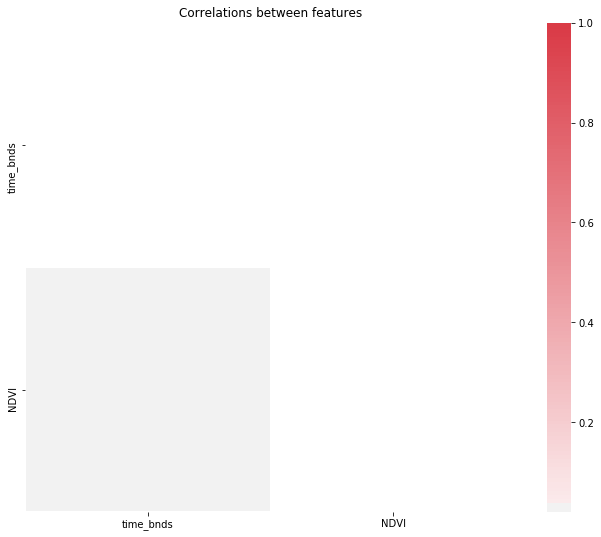

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
plt.title("Correlations between features")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a161550>,
      dtype=object)

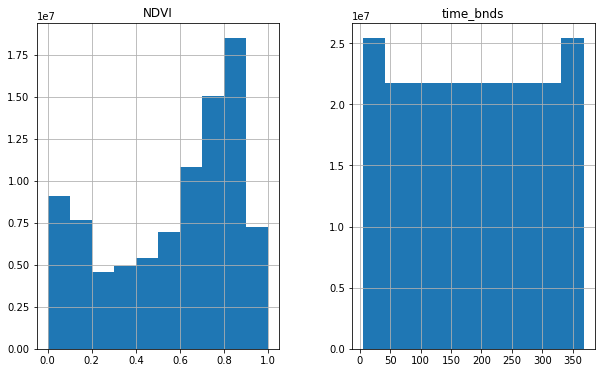

In [26]:
df.hist(figsize=(10,6))

In [20]:
df_header = df.columns
df_header
# fire_feature = fire_header[4:12]
# fire_feature

Index(['time_bnds', 'NDVI'], dtype='object')

In [2]:
data = Dataset('../data/gimms3g_ndvi_1982-2012.nc4', mode='r')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    GDAL_AREA_OR_POINT: Area
    GDAL: GDAL 1.10.0, released 2013/04/24
    Conventions: CF-1.6
    title: Mean Normalized Difference Vegetation Index in growing season (June, July, and August)
    source: GIMMGS3g
    contact: Kevin Guay
    institution: Woods Hole Research Center
    email: kguay@whrc.org
    references: Guay, K.C., P.S.A. Beck, L.T. Berner, S.J. Goetz, A. Baccini, and W. Buermann. 2014. Vegetation productivity patterns at high northern latitudes: a multi-sensor satellite data assessment. Global Change Biology 20(10):3147�3158. doi:10.1111/gcb.12647
    history: Converted to CF-netCDF v4 at Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC) on Feb. 10th, 2015
    dimensions(sizes): time(31), nv(2), lat(840), lon(4320)
    variables(dimensions): float64 time_bnds(time,nv), float64 time(time), float64 NDVI(time,lat,lon), float64 lat(lat), float64 lon(l

In [37]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
ndvi_data = data.variables['NDVI'][:]
bnds = data.variables['time_bnds'][:]
time_data = data.variables['time'][:]

In [39]:
lons

masked_array(data=[-179.95833333, -179.875     , -179.79166667, ...,
                    179.79166667,  179.875     ,  179.95833333],
             mask=False,
       fill_value=1e+20)

In [33]:
type(ndvi_data)

numpy.ma.core.MaskedArray

TypeError: Input z must be a 2D array.

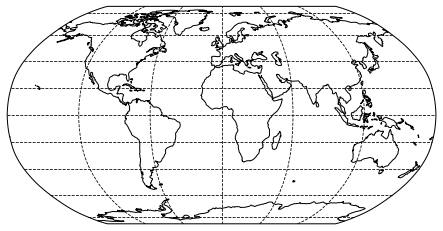

In [35]:
# Plot the data using matplotlib and cartopy

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(230,311,5)
plt.contourf(lons, lats, ndvi_data, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Title', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Save the plot as a PNG image

fig.savefig('ndvi.png', format='png', dpi=360)

In [ ]:

# list of lists
list_of_lists = [[bnds],[time_data],[lats],[lons],[ndvi_data]]


# columns
cols = ['bnds','time_data','lats','lons','ndvi_data']


# pass in array and columns
vegdf = pd.DataFrame(data=[[bnds],[time_data],[lats],[lons],[ndvi_data]], columns=cols)

In [ ]:
vegdf = pd.DataFrame(data)